<a href="https://colab.research.google.com/github/rakib3004/gar-method-for-cricket/blob/main/ML_Project_Improved_D_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPROVED DLS METHOD**
---



# Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
import seaborn as sns
import statsmodels.api as sm


In [3]:
#Load dataset

csv_file_path = '/content/drive/MyDrive/ML_Improve_DLS_Method/ML Project - MainDataset.csv'

# csv_file_path = '/content/drive/MyDrive/Shared/MachineLearningResearch/dataset.csv'
df = pd.read_csv(csv_file_path)

df.head()

,Remaining_Overs,Wickets_Lost,Venue_Name,Venue_Avg_Score,Day_Night,DLS_Resource
0,50,0,Mirpur,239.27,D/N,100.0
1,49,0,Mirpur,239.27,D/N,99.2
2,48,0,Mirpur,239.27,D/N,98.3
3,47,0,Mirpur,239.27,D/N,97.4
4,46,0,Mirpur,239.27,D/N,96.5


In [4]:
df.describe()

,Remaining_Overs,Wickets_Lost,Venue_Avg_Score,DLS_Resource
count,4080.000000,4080.000000,4080.000000,4080.000000
mean,25.000000,4.500000,229.037500,38.462745
std,14.721406,2.872633,37.422497,25.464188
min,0.000000,0.000000,135.000000,0.000000
25%,12.000000,2.000000,232.165000,16.400000
50%,25.000000,4.500000,240.385000,35.500000
75%,38.000000,7.000000,248.705000,58.300000
max,50.000000,9.000000,261.970000,100.000000


# **Data Preprocessing**

# Data Cleaning

In [5]:
# Remove rows with any missing values

df_cleaned = df.dropna()

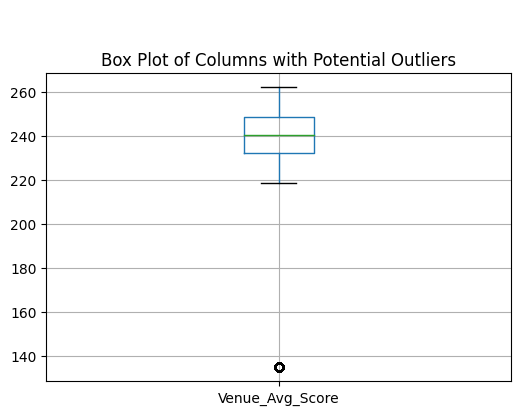




Int64Index([2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
            ...
            2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549],
           dtype='int64', length=510)


Rows removed as outliers in both IQR and MAD methods:
Int64Index([2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
            ...
            2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549],
           dtype='int64', length=510)


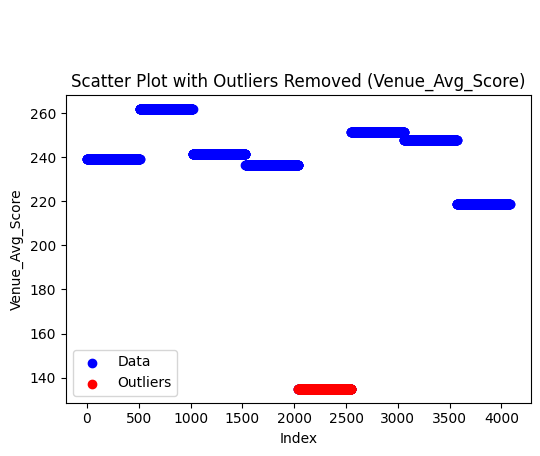

In [6]:
# Finding outliers



columns_to_check = ['Venue_Avg_Score']



# Create a box plot to visualize potential outliers
plt.figure(figsize=(6, 4))
df[columns_to_check].boxplot()
plt.title('\n\nBox Plot of Columns with Potential Outliers')
plt.show()



# Function to detect outliers using the IQR (Inter Quartile Range) method
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


# Function to detect outliers using the MAD (Median Absolute Deviation) method
def detect_outliers_mad(column):
    median = column.median()
    mad = (column - column.median()).abs().median()
    threshold = 3.5  # You can adjust this threshold as needed

    outliers = column[abs((column - median) / mad) > threshold]
    return outliers


outliers_iqr = detect_outliers_iqr(df[columns_to_check[0]])
outliers_mad = detect_outliers_mad(df[columns_to_check[0]])

# Find rows that are outliers in both methods
common_outliers = outliers_iqr.index.intersection(outliers_mad.index)

print('\n\n')
print(common_outliers)

df_cleaned = df.drop(index=common_outliers)

print("\n\nRows removed as outliers in both IQR and MAD methods:")
print(common_outliers)

plt.figure(figsize=(6, 4))
plt.scatter(range(len(df)), df[columns_to_check[0]], c='b', label='Data')
plt.scatter(common_outliers, df[columns_to_check[0]].loc[common_outliers], c='r', label='Outliers')
plt.xlabel('Index')
plt.ylabel(columns_to_check[0])
plt.title(f'\n\n\nScatter Plot with Outliers Removed ({columns_to_check[0]})')
plt.legend()
plt.show()

df = df_cleaned


# Data Encoding

In [7]:
# Group by unique combinations of Venue_Name and Day_Night
grouped = df.groupby(['Venue_Name', 'Day_Night'])

venue_avg_score_map = {}

for (venue_name, day_night), group in grouped:
    avg_score = group['Venue_Avg_Score'].mean()
    key = f'{venue_name}_{day_night}'
    venue_avg_score_map[key] = avg_score

for key, avg_score in venue_avg_score_map.items():
    print(f'Combination: {key}, Average Score: {avg_score}')

Combination:  Harare_D, Average Score: 218.77
Combination:  Harare_D/N, Average Score: 236.63000000000005
Combination:  Sharjah_D, Average Score: 247.83
Combination: Colombo (RPS)_D, Average Score: 251.32999999999998
Combination: Colombo (RPS)_D/N, Average Score: 261.97000000000014
Combination: Mirpur_D/N, Average Score: 239.27
Combination: Sharjah_D, Average Score: 247.82999999999996
Combination: Sharjah_D/N, Average Score: 241.5


In [8]:
# One-Hot Encoding for Day_Night attribute
df = pd.get_dummies(df, columns=['Day_Night'], prefix=['Day_Night'])

print(df.head())

   Remaining_Overs  Wickets_Lost Venue_Name  Venue_Avg_Score  DLS_Resource  \
0               50             0     Mirpur           239.27         100.0   
1               49             0     Mirpur           239.27          99.2   
2               48             0     Mirpur           239.27          98.3   
3               47             0     Mirpur           239.27          97.4   
4               46             0     Mirpur           239.27          96.5   

   Day_Night_D  Day_Night_D/N  
0            0              1  
1            0              1  
2            0              1  
3            0              1  
4            0              1  


In [9]:
# Mean and Target Encoding for venue

mean_encoding = df.groupby('Venue_Name')['Venue_Avg_Score'].mean().to_dict()

# Mean Encoding and Target Encoding
df['Venue_Name_Mean_Encoded'] = df['Venue_Name'].map(mean_encoding)

print(df.head())


   Remaining_Overs  Wickets_Lost Venue_Name  Venue_Avg_Score  DLS_Resource  \
0               50             0     Mirpur           239.27         100.0   
1               49             0     Mirpur           239.27          99.2   
2               48             0     Mirpur           239.27          98.3   
3               47             0     Mirpur           239.27          97.4   
4               46             0     Mirpur           239.27          96.5   

   Day_Night_D  Day_Night_D/N  Venue_Name_Mean_Encoded  
0            0              1                   239.27  
1            0              1                   239.27  
2            0              1                   239.27  
3            0              1                   239.27  
4            0              1                   239.27  


# Feature Selection

<ipython-input-10-5d440ccccd85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


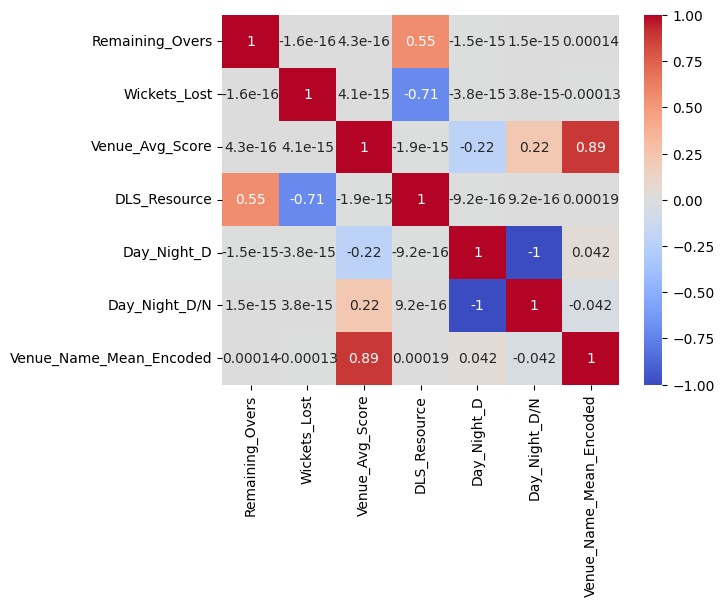

In [10]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['DLS_Resource']
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [11]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
# Create the RFE object with the estimator (LinearRegression) and f_regression score function
num_features_to_select = 5
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=num_features_to_select)
# Separate the features (X) and the target variable (y)
X = df.drop('DLS_Resource', axis=1)
y = df['DLS_Resource']
print(X)

label_encoder = LabelEncoder()
X['Venue_Name'] = label_encoder.fit_transform(X['Venue_Name'])
rfe.fit(X, y)
# Get the selected features
selected_features_indices = rfe.support_
selected_features = X.columns[selected_features_indices]

print("Selected Features:")
print(selected_features)


      Remaining_Overs  Wickets_Lost Venue_Name  Venue_Avg_Score  Day_Night_D  \
0                  50             0     Mirpur           239.27            0   
1                  49             0     Mirpur           239.27            0   
2                  48             0     Mirpur           239.27            0   
3                  47             0     Mirpur           239.27            0   
4                  46             0     Mirpur           239.27            0   
...               ...           ...        ...              ...          ...   
4075                4             9     Harare           218.77            1   
4076                3             9     Harare           218.77            1   
4077                2             9     Harare           218.77            1   
4078                1             9     Harare           218.77            1   
4079                0             9     Harare           218.77            1   

      Day_Night_D/N  Venue_Name_Mean_En

In [12]:
# Calculate the correlation coefficients between 'DLS_Resource' and the selected features
selected_features = ['Remaining_Overs', 'Wickets_Lost', 'Venue_Name_Mean_Encoded', 'Day_Night_D']

correlations = df[selected_features].corrwith(df['DLS_Resource'])
abs_correlations = correlations.abs()
# Normalize the absolute values so their summation becomes 1
normalized_correlations = abs_correlations / abs_correlations.sum()
print("Correlation between DLS_Resource and selected features:")
print(normalized_correlations)

Correlation between DLS_Resource and selected features:
Remaining_Overs            4.395338e-01
Wickets_Lost               5.603127e-01
Venue_Name_Mean_Encoded    1.534673e-04
Day_Night_D                1.121414e-16
dtype: float64


# Feature Scaling (Standardization)

In [13]:
mean_remaining_overs = df['Remaining_Overs'].mean()
std_remaining_overs = df['Remaining_Overs'].std()

mean_wickets_lost = df['Wickets_Lost'].mean()
std_wickets_lost = df['Wickets_Lost'].std()

mean_venue_avg_score = df['Venue_Avg_Score'].mean()
std_venue_avg_score = df['Venue_Avg_Score'].std()

mean_dls_resource = df['DLS_Resource'].mean()
std_dls_resource = df['DLS_Resource'].std()

In [14]:
# Feature Scaling on 5 columns - 'Remaining_Overs,  Wickets_Lost, Venue_Avg_Score, Day_Night_D, Day_Night_D/N'

columns_to_scale = ['Remaining_Overs', 'Wickets_Lost', 'Venue_Name_Mean_Encoded', 'Day_Night_D']
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())


   Remaining_Overs  Wickets_Lost Venue_Name  Venue_Avg_Score  DLS_Resource  \
0         1.698416     -1.566699     Mirpur           239.27         100.0   
1         1.630479     -1.566699     Mirpur           239.27          99.2   
2         1.562542     -1.566699     Mirpur           239.27          98.3   
3         1.494606     -1.566699     Mirpur           239.27          97.4   
4         1.426669     -1.566699     Mirpur           239.27          96.5   

   Day_Night_D  Day_Night_D/N  Venue_Name_Mean_Encoded  
0    -0.866025              1                -0.289109  
1    -0.866025              1                -0.289109  
2    -0.866025              1                -0.289109  
3    -0.866025              1                -0.289109  
4    -0.866025              1                -0.289109  


**Weight Assigned**


In [15]:
scaler = StandardScaler()

print(selected_features)
scaled_features = scaler.fit_transform(df[columns_to_scale])

print(scaled_features)

# Multiply the scaled features by the normalized correlations
weighted_features = scaled_features * normalized_correlations.values

for i, feature in enumerate(selected_features):
    df[feature + '_Weighted'] = weighted_features[:, i]

print(df.head())

['Remaining_Overs', 'Wickets_Lost', 'Venue_Name_Mean_Encoded', 'Day_Night_D']
[[ 1.69841555 -1.5666989  -0.28910897 -0.8660254 ]
 [ 1.63047893 -1.5666989  -0.28910897 -0.8660254 ]
 [ 1.56254231 -1.5666989  -0.28910897 -0.8660254 ]
 ...
 [-1.56254231  1.5666989  -1.33395215  1.15470054]
 [-1.63047893  1.5666989  -1.33395215  1.15470054]
 [-1.69841555  1.5666989  -1.33395215  1.15470054]]
   Remaining_Overs  Wickets_Lost Venue_Name  Venue_Avg_Score  DLS_Resource  \
0         1.698416     -1.566699     Mirpur           239.27         100.0   
1         1.630479     -1.566699     Mirpur           239.27          99.2   
2         1.562542     -1.566699     Mirpur           239.27          98.3   
3         1.494606     -1.566699     Mirpur           239.27          97.4   
4         1.426669     -1.566699     Mirpur           239.27          96.5   

   Day_Night_D  Day_Night_D/N  Venue_Name_Mean_Encoded  \
0    -0.866025              1                -0.289109   
1    -0.866025           

# **Mehodology**

# Data Splitting (Train, Validation, Split)

In [16]:
# Data splitting into Training data, Validation data and Testing data

features = ['Remaining_Overs', 'Wickets_Lost', 'Venue_Name_Mean_Encoded', 'Day_Night_D']
target = 'DLS_Resource'

# Split the data into 70% train, 10% validation, and 20% test
X_train, X_temp, y_train, y_temp = train_test_split(df[features], df[target], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)


print("\nTraining Data:")
print(X_train.head())
print('\nLabel: ')
print(y_train.head())

print("\n\n\nValidation Data:")
print(X_val.head())
print('\nLabel: ')
print(y_val.head())

print("\n\n\nTesting Data:")
print(X_test.head())
print('\nLabel: ')
print(y_test.head())


Training Data:
      Remaining_Overs  Wickets_Lost  Venue_Name_Mean_Encoded  Day_Night_D
844         -0.203810      0.522233                 1.280413    -0.866025
1537         1.222859     -1.566699                -1.333952    -0.866025
1151        -0.271746     -0.870388                 0.197813    -0.866025
1725        -1.154923     -0.522233                -1.333952    -0.866025
3790         0.611430     -0.174078                -1.333952     1.154701

Label: 
844     34.1
1537    93.6
1151    55.7
1725    26.3
3790    57.2
Name: DLS_Resource, dtype: float64



Validation Data:
      Remaining_Overs  Wickets_Lost  Venue_Name_Mean_Encoded  Day_Night_D
1765        -0.407620     -0.174078                -1.333952    -0.866025
772          1.222859      0.174078                 1.280413    -0.866025
354         -1.562542      0.522233                -0.289109    -0.866025
1712        -0.271746     -0.522233                -1.333952    -0.866025
2786        -0.475556     -0.174078      

# Model Selection and Training

In [17]:
# Multi Variate Regression
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

coefficients = regression_model.coef_
intercept = regression_model.intercept_

equation = "DLS_Resource = "
for i, feature in enumerate(features):
    equation += f"({coefficients[i]:.2f} * {feature}) + "
equation += f"{intercept:.2f}"

print("\n\nMultivariate Linear Regression Equation:")
print(equation)
print("\n\n")



Multivariate Linear Regression Equation:
DLS_Resource = (13.82 * Remaining_Overs) + (-17.94 * Wickets_Lost) + (0.01 * Venue_Name_Mean_Encoded) + (-0.14 * Day_Night_D) + 38.60





# Predicting 2nd Innings score using Improved DLS method

In [24]:
# Test Input values
remaining_overs = 25
wickets_lost = 3
venue_name = 'Harare'
day_night = 'D/N'
first_innings_score = 250


venue_avg_score_key = f' {venue_name}_{day_night}'
venue_avg_score = venue_avg_score_map.get(venue_avg_score_key, 0)

day_night_d = 1 if day_night == 'D' else 0


scaled_remaining_overs = (remaining_overs - mean_remaining_overs) / std_remaining_overs
scaled_wickets_lost = (wickets_lost - mean_wickets_lost) / std_wickets_lost
scaled_venue_avg = (venue_avg_score - mean_venue_avg_score) / std_venue_avg_score

# Calculate the DLS_Resource using the regression equation
dls_resource = (
    coefficients[0] * normalized_correlations[0] * scaled_remaining_overs +
    coefficients[1] * normalized_correlations[1] * scaled_wickets_lost +
    coefficients[2] * normalized_correlations[2] * scaled_venue_avg +
    coefficients[3] * normalized_correlations[3] * day_night_d +
    intercept
)


# Scaling the predicted resource in a scale range of 0-100
# ScaledPrediction = (Prediction - Min) * (NewMax - NewMin) / (Max - Min) + NewMin
ScaledPrediction = (dls_resource - 9) * (100 - 0) / (65 - 9) + 0


print(f"Remaining_Overs: {remaining_overs}")
print(f"Wickets_Lost: {wickets_lost}")
print(f"Venue_Avg_Score: {venue_avg_score}")
print(f"Day_Night_D: {day_night_d}")
print(f"1st_Innings_Score: {first_innings_score}")

print(f"\nDLS_Resource (Result of Regression Equation): {ScaledPrediction: .0f}")

Remaining_Overs: 25
Wickets_Lost: 3
Venue_Avg_Score: 236.63000000000005
Day_Night_D: 0
1st_Innings_Score: 250

DLS_Resource (Result of Regression Equation):  62


# Evaluation for Regression Model

In [26]:
y_pred = regression_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R^2): {:.2f}".format(r2))


Mean Absolute Error (MAE): 9.05
Mean Squared Error (MSE): 129.06
Root Mean Squared Error (RMSE): 11.36
R-squared (R^2): 0.80


In [29]:
cross_val_scores = cross_val_score(regression_model, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean R-squared (R^2) Score:", np.mean(cross_val_scores))


Cross-Validation Scores: [0.83799082 0.82204747 0.76740288 0.80355609 0.79613187]
Mean R-squared (R^2) Score: 0.8054258279144675


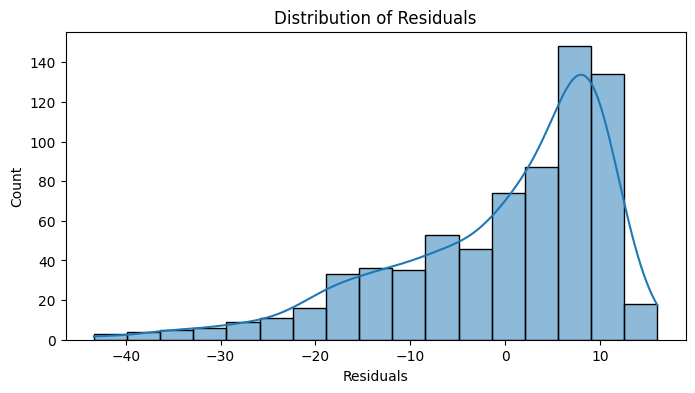

In [33]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


# Data Visualization

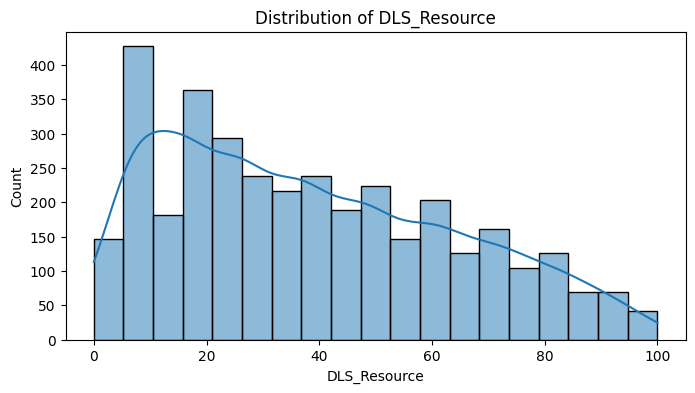

In [34]:
plt.figure(figsize=(8, 4))
sns.histplot(df[target], kde=True)
plt.title(f'Distribution of {target}')
plt.show()


      Remaining_Overs  Wickets_Lost  Venue_Name_Mean_Encoded  Day_Night_D  \
0            1.698416     -1.566699                -0.289109    -0.866025   
1            1.630479     -1.566699                -0.289109    -0.866025   
2            1.562542     -1.566699                -0.289109    -0.866025   
3            1.494606     -1.566699                -0.289109    -0.866025   
4            1.426669     -1.566699                -0.289109    -0.866025   
...               ...           ...                      ...          ...   
4075        -1.426669      1.566699                -1.333952     1.154701   
4076        -1.494606      1.566699                -1.333952     1.154701   
4077        -1.562542      1.566699                -1.333952     1.154701   
4078        -1.630479      1.566699                -1.333952     1.154701   
4079        -1.698416      1.566699                -1.333952     1.154701   

      DLS_Resource  
0            100.0  
1             99.2  
2           

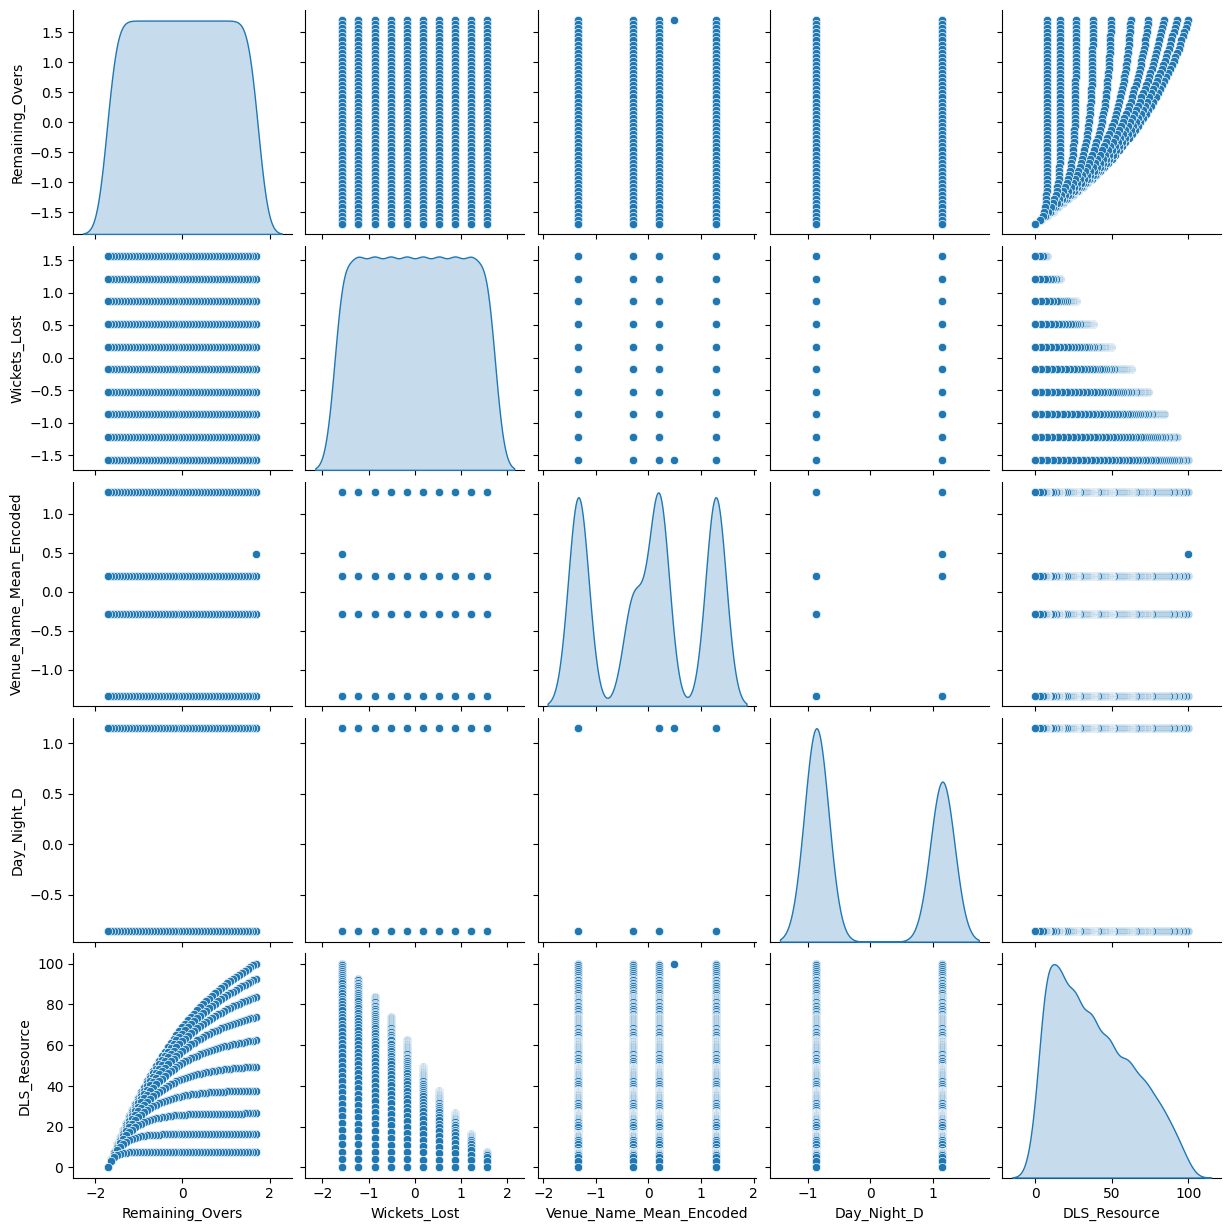

<Figure size 400x200 with 0 Axes>

In [35]:
data = df[features + [target]]
sns.pairplot(data, kind='scatter', diag_kind='kde')
print(data)
plt.figure(figsize=(4, 2))
plt.show()
